### Project Title: Loan Eligibility Prediction

This project aims to predict the eligibility of loan applicants based on a dataset with features like 'Gender,' 'Married,' 'Dependents,' 'Education,' 'Self_Employed,' 'ApplicantIncome,' 'CoapplicantIncome,' 'LoanAmount,' 'Loan_Amount_Term,' 'Credit_History,' and 'Property_Area.' The target variable is 'Loan_Status,' which indicates whether a loan was approved (Y) or not (N). The goal is to build a machine learning model that accurately predicts loan eligibility by analyzing these factors.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, RobustScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Loan_Data.csv")
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df = df.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == "object" else x)

In [8]:
df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype == "float64" else x)

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [11]:
df.drop(columns = "Loan_ID", inplace = True)

In [12]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y


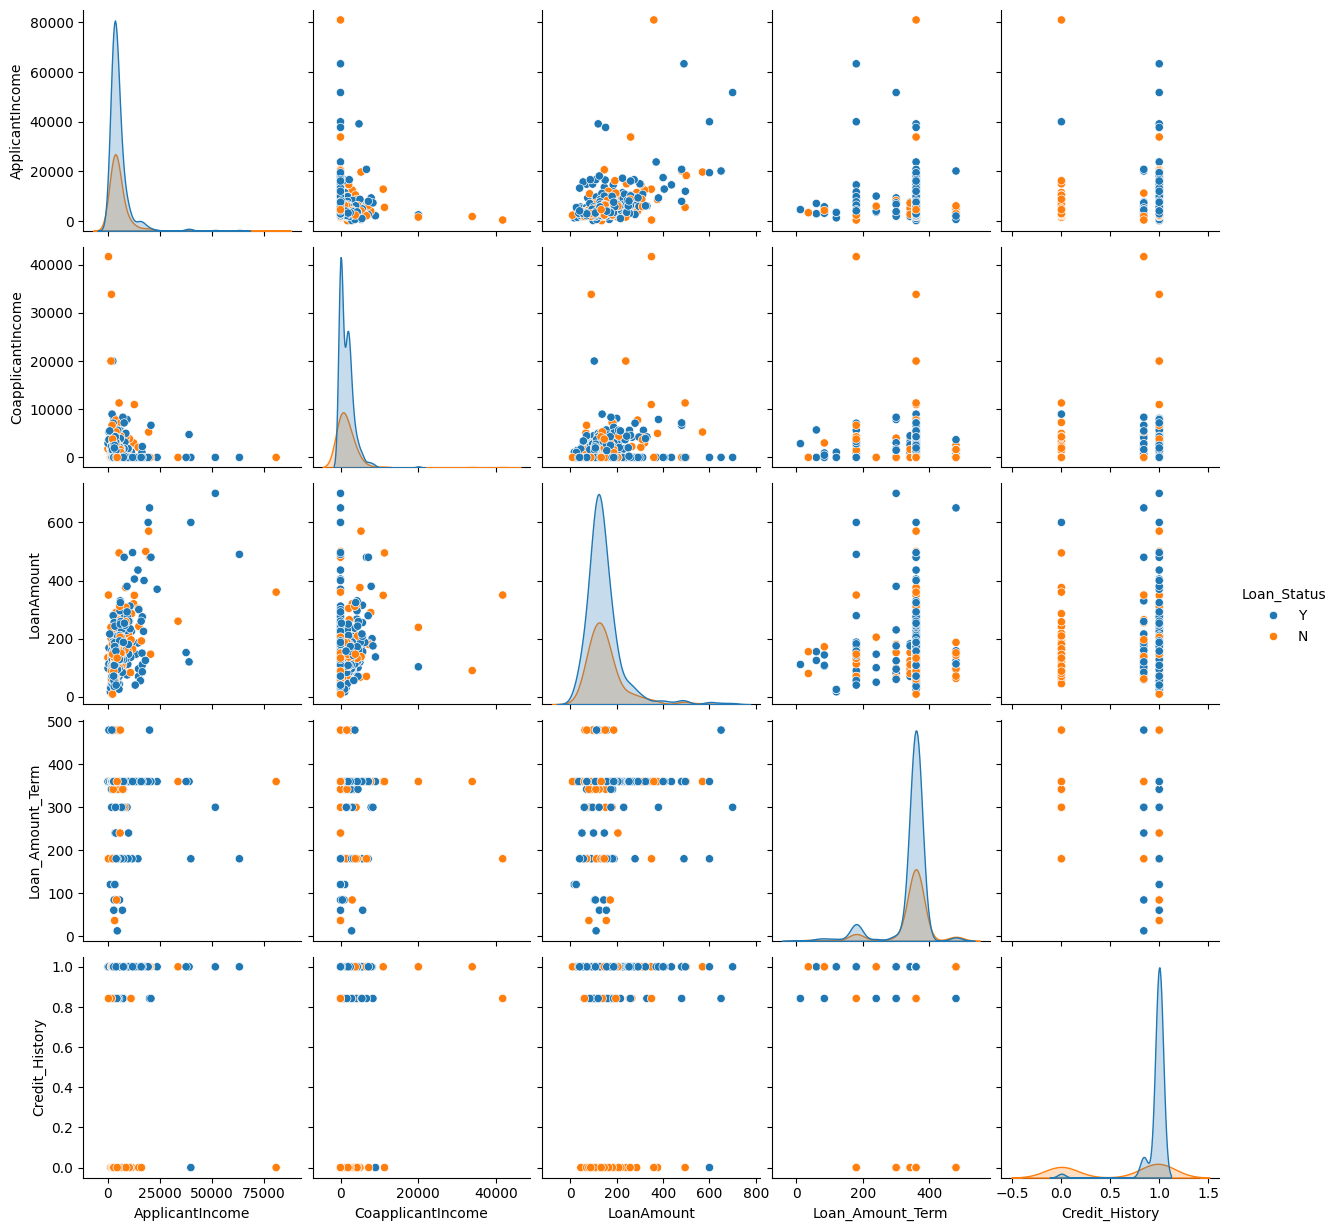

In [13]:
sns.pairplot(df, hue = "Loan_Status")
plt.show()

In [14]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
df["Married"].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
df["Dependents"].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [17]:
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [18]:
df["Self_Employed"].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [20]:
df["Credit_History"].unique()

array([1.        , 0.        , 0.84219858])

In [21]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [22]:
# Applying OneHotEncoder for Categorical Columns

ohe = OneHotEncoder(drop='first' ,sparse_output=False)
encoded = ohe.fit_transform(df[["Property_Area"]])


In [23]:
encoded_df = pd.DataFrame(encoded, columns = ohe.get_feature_names_out(["Property_Area"]))


In [24]:
df = pd.concat([df, encoded_df], axis=1)
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,0.0,1.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,0.0,0.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,0.0,1.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,0.0,1.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0.0,1.0


In [25]:
df.drop(columns = "Property_Area", inplace = True)

In [26]:
for col in df.columns:
    if df[col].dtypes == "object" or df[col].dtype.name == "category":
        df[col] = LabelEncoder().fit_transform(df[col])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,1,0.0,1.0
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0.0,0.0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,1,0.0,1.0
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,0.0,1.0
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,1,0.0,1.0


In [27]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,1,0.0,1.0
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0.0,0.0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,1,0.0,1.0
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,0.0,1.0
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,1,0.0,0.0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,1,0.0,0.0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,1,0.0,1.0
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,1,0.0,1.0


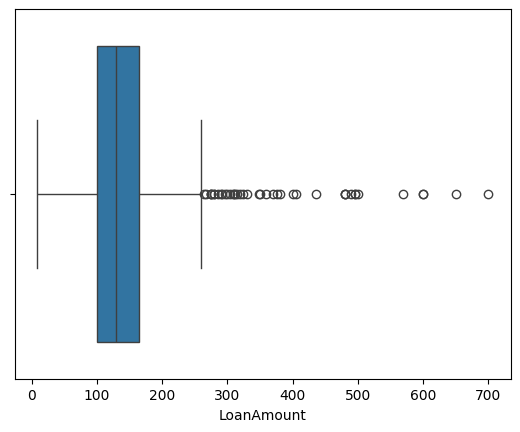

In [28]:
sns.boxplot(x= "LoanAmount", data=df)
plt.show()

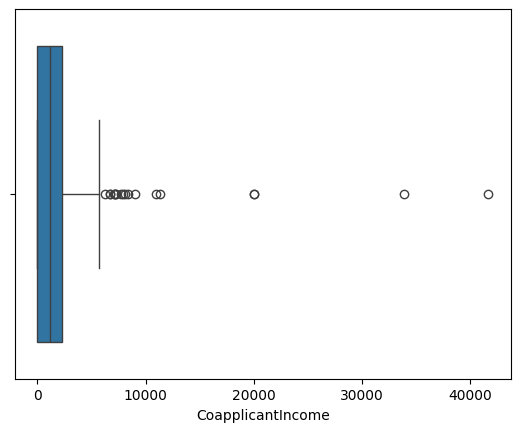

In [29]:
sns.boxplot(x= "CoapplicantIncome", data=df)
plt.show()

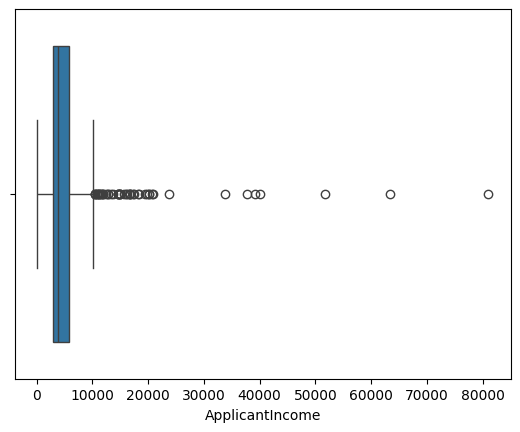

In [30]:
sns.boxplot(x= "ApplicantIncome", data=df)
plt.show()

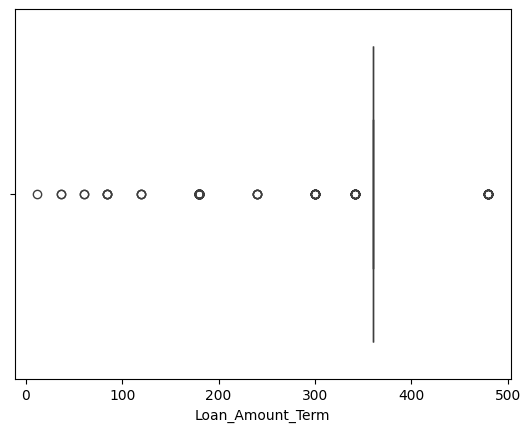

In [31]:
sns.boxplot(x= "Loan_Amount_Term", data=df)
plt.show()

In [32]:
# Applying Robust Scaler

rs = RobustScaler()

col_to_scale = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

df[col_to_scale] = rs.fit_transform(df[col_to_scale])

df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0.698029,-0.517358,0.269956,0.0,1.0,1,0.0,1.0
1,1,1,1,0,0,0.264096,0.139079,-0.015504,0.0,1.0,0,0.0,0.0
2,1,1,0,0,1,-0.278492,-0.517358,-0.976744,0.0,1.0,1,0.0,1.0
3,1,1,0,1,0,-0.421422,0.509087,-0.139535,0.0,1.0,1,0.0,1.0
4,1,0,0,0,0,0.749786,-0.517358,0.186047,0.0,1.0,1,0.0,1.0


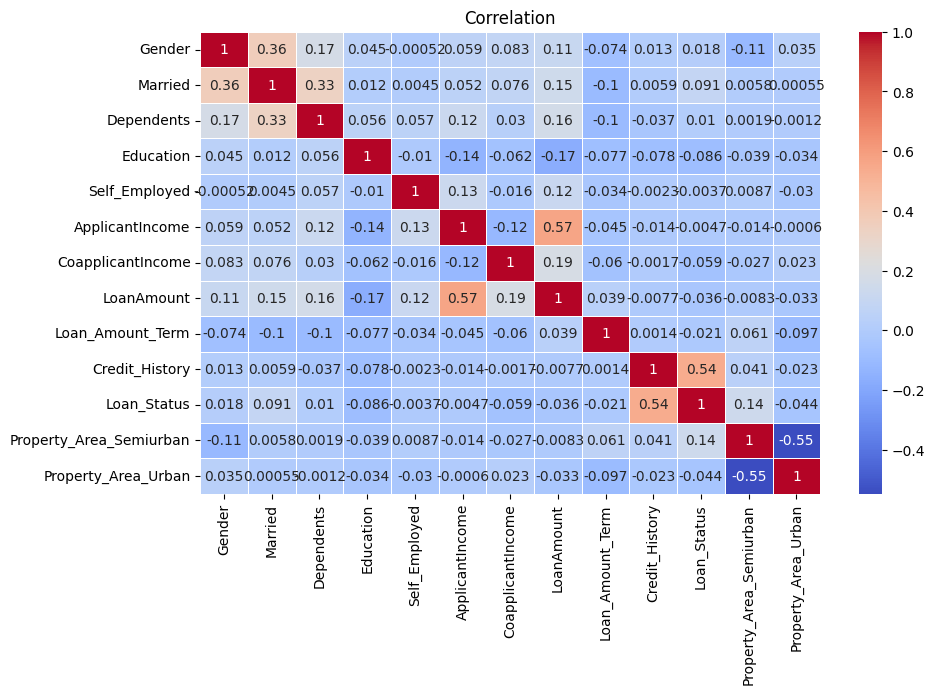

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation")
plt.show()

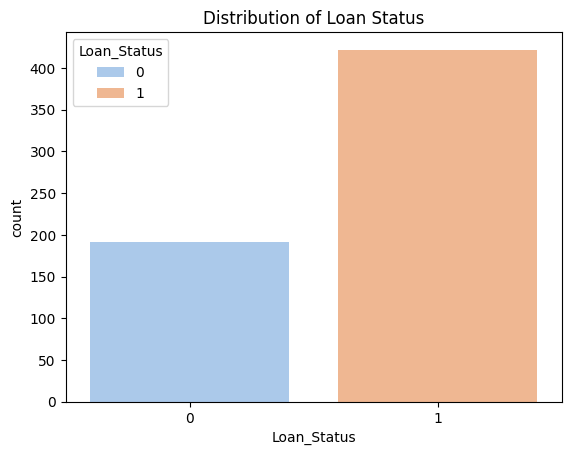

In [34]:
sns.countplot(x='Loan_Status', hue = 'Loan_Status', data=df, palette='pastel') 
plt.title('Distribution of Loan Status')
plt.show()

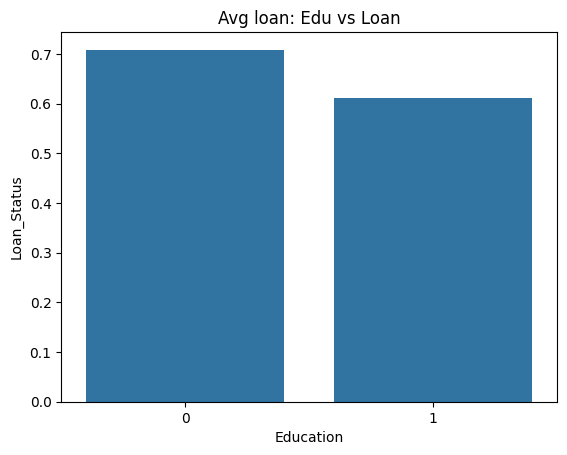

In [35]:
edu_loan = df.groupby("Education")["Loan_Status"].mean().reset_index()
sns.barplot(x="Education", y="Loan_Status", data=edu_loan)
plt.title("Avg loan: Edu vs Loan")
plt.show()

In [36]:
# Splitting data 

x= df.drop(["Loan_Status"], axis=1)
y= df["Loan_Status"]
x.shape, y.shape

((614, 12), (614,))

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban
350,1,1,0,0,0,1.806512,-0.517358,1.534884,0.0,1.000000,1.0,0.0
377,1,1,0,0,0,0.170523,-0.517358,0.015504,0.0,0.842199,1.0,0.0
163,1,1,2,0,0,0.121508,0.112526,0.449612,0.0,1.000000,0.0,0.0
609,0,0,0,0,0,-0.312768,-0.517358,-0.899225,0.0,1.000000,0.0,0.0
132,1,0,0,0,0,-0.375150,-0.517358,-0.914729,0.0,1.000000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
231,1,1,0,0,0,-0.033076,-0.517358,-1.348837,-180.0,1.000000,0.0,0.0
312,0,0,0,0,0,-0.447472,-0.517358,-1.131783,0.0,1.000000,0.0,0.0
248,1,1,1,0,0,-0.318937,0.284906,-0.093023,120.0,1.000000,1.0,0.0
11,1,1,2,0,0,-0.449871,0.283600,-0.310078,0.0,1.000000,0.0,1.0


In [38]:
# create pipeline with Random Forest Classifier

pipeline = Pipeline([('rf', RandomForestClassifier(n_estimators=100, random_state=42))])

In [39]:
# Perform hyperparameter tuning using GridSearchCV

param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

In [40]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring = 'accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 5, 10],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [41]:
# Print the best hyperparameters and the corresponding accuracy score

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'rf__max_depth': 5, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 50}
Best Score: 0.8145537002679859


In [42]:
# Train a Random Forest Classifier on the training set using the best hyperparameters

rf = grid_search.best_estimator_.named_steps["rf"]
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=50,
                       random_state=42)

In [43]:
#Make predictions on the test set

y_pred = rf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [44]:
# Evaluate the accuracy of the model

print("Accuracy:", accuracy_score(y_test, y_pred)*100)

Accuracy: 78.86178861788618


In [45]:
# Print the classification report

print(classification_report(y_test, y_pred)*100)

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123
              precisio

In [46]:
# Print the confusion matrix

print(confusion_matrix(y_test, y_pred))

[[18 25]
 [ 1 79]]


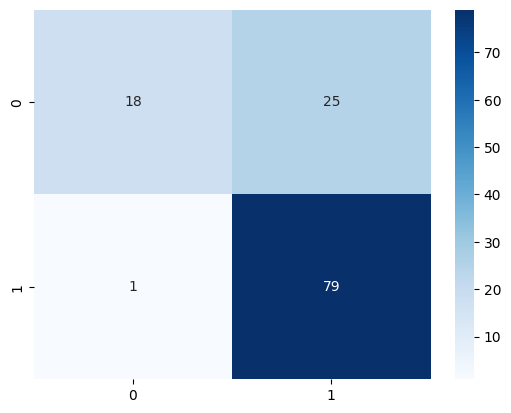

In [47]:
# Plot the confusion matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")
plt.show()

##### # The confusion matrix compares actual labels (y_test) with predicted labels (y_pred). It's visualized as a heatmap with a blue color map and annotated values. 

In [48]:
feature_importances = rf.feature_importances_
print("feature_importances")
for i, feature in enumerate(x.columns):
    print(f"{feature}: {feature_importances[i]}")


feature_importances
Gender: 0.009036992722201086
Married: 0.024257073255420054
Dependents: 0.02481380334611779
Education: 0.014824952467751678
Self_Employed: 0.0064472157768209895
ApplicantIncome: 0.09577426344718719
CoapplicantIncome: 0.06048765464809204
LoanAmount: 0.10457002185518373
Loan_Amount_Term: 0.05536598749619974
Credit_History: 0.5525850625883212
Property_Area_Semiurban: 0.040587401504591274
Property_Area_Urban: 0.011249570892113314


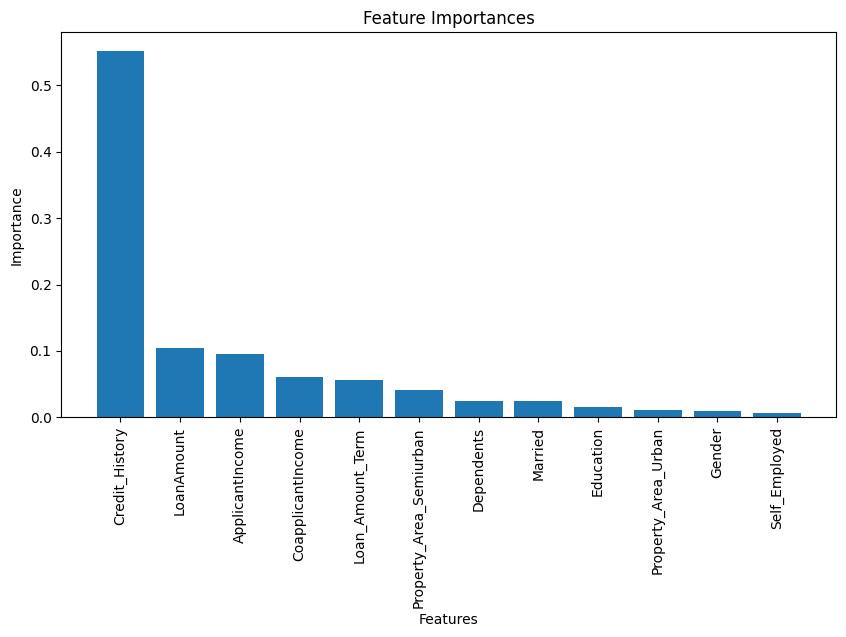

In [49]:
# Plot the feature importances

plt.figure(figsize=(10, 5))
indices = np.argsort(feature_importances)[::-1]
plt.bar(x.columns[indices], feature_importances[indices])
plt.xticks(rotation=90)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

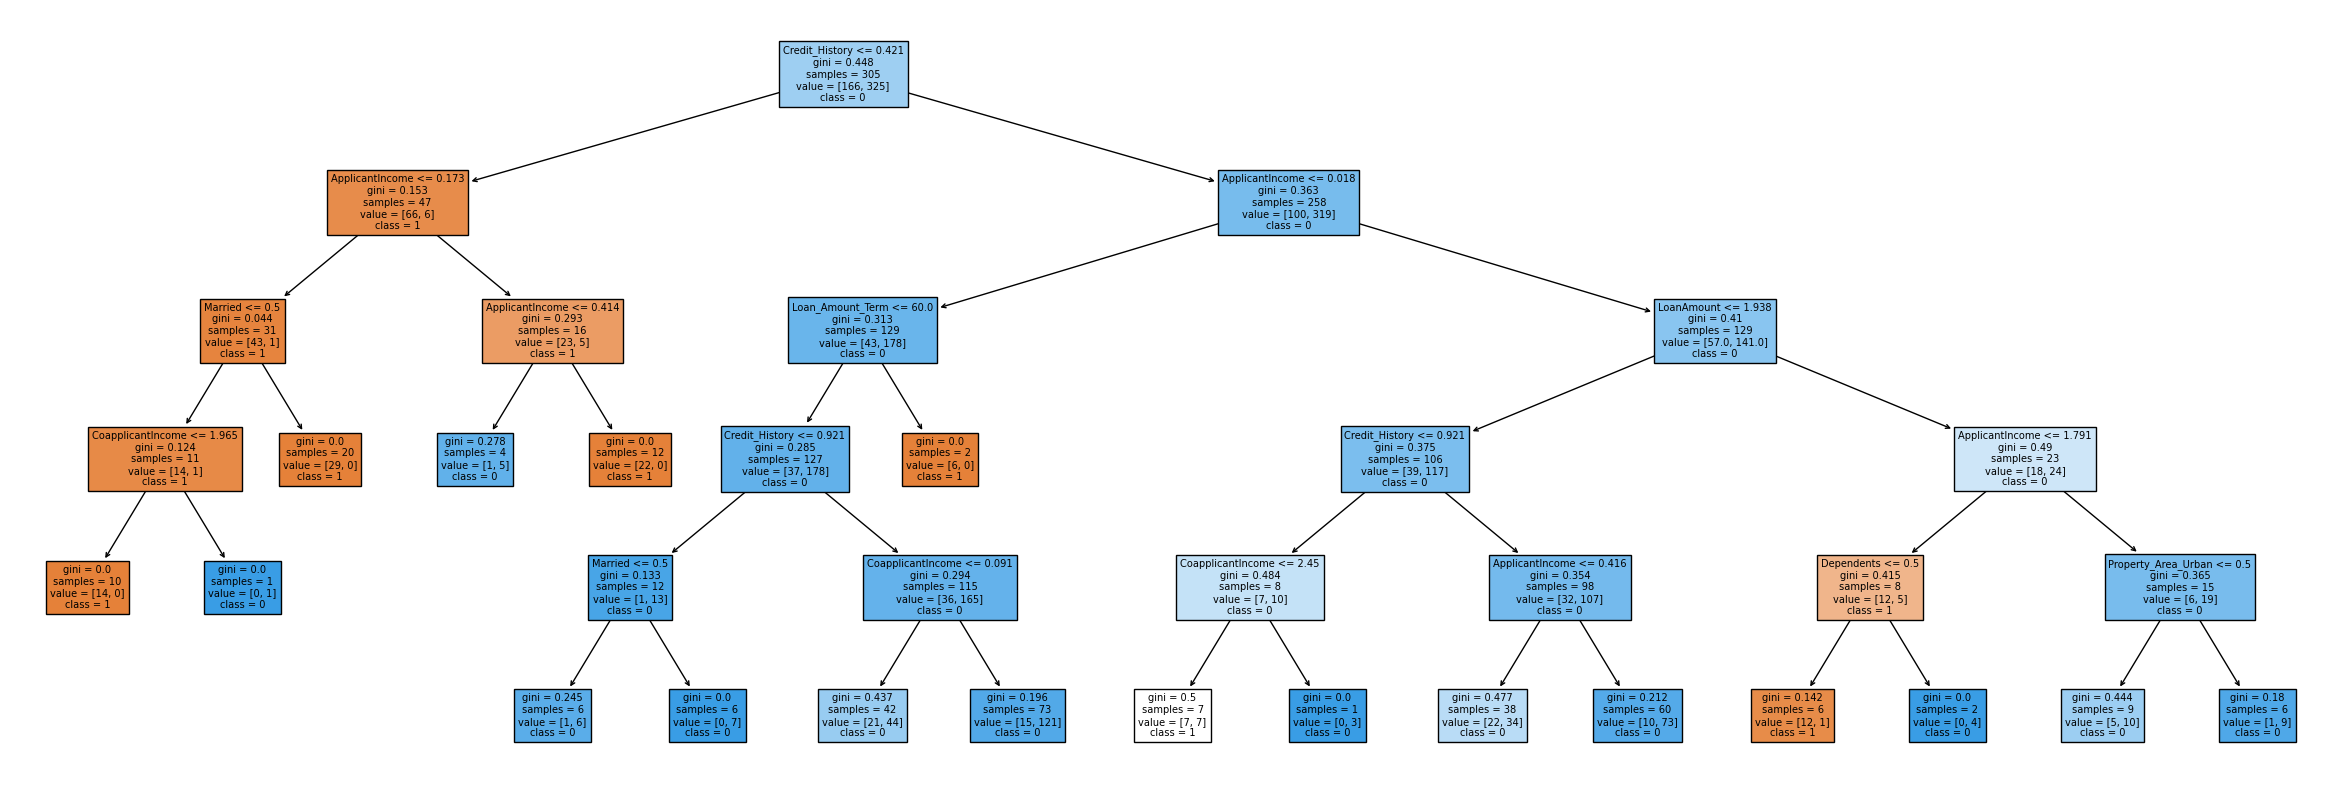

In [50]:
# Plot the first decision tree of a Random Forest Classifier

plt.figure(figsize=(30, 10))
plt.title("Decision Tree")
class_names = y.unique().astype(str)
plot_tree(rf.estimators_[0], feature_names=x.columns, class_names=class_names, filled=True)
plt.show()

#### Key insights:

##### Best Score: 81.46% with optimized hyperparameters.
##### Model Accuracy: 78.86%.
##### Top Features:
##### Credit History (55.26%)
##### Loan Amount (10.46%)
##### Applicant Income (9.58%)
##### Credit history is the most critical factor in predicting loan eligibility.